In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
#from sys import MAXINT

%matplotlib inline

In [2]:
data = np.array(pd.read_csv('two_clusters.csv', sep='|', header=None).astype('float64'))

## E-step

In [3]:
def norm2D(xy, mu, sig):
    p = 1
    for i in range(2):
        p *= norm.pdf(xy[i], mu[i], sig[i,i])
    return p

In [4]:
def point_respons(xy, mu, sig, mix_coeff):
    evidence = 0
    for j in range(len(mix_coeff)):
        evidence += mix_coeff[j]*norm2D(xy, mu[j], sig[j])
    result = []
    for k in range(len(mix_coeff)):
        gamma = mix_coeff[k]*norm2D(xy, mu[k], sig[k])/evidence
        result.append(gamma)
    return result    

In [5]:
def e_step(data, mu, sig, mix_coeff, respons_table):
    for i in range(len(data)):        
        respons_table[i] = point_respons(data[i], mu, sig, mix_coeff)
    #print(respons_table)
    return respons_table

## M-step

In [6]:
def m_step(data, mu, sig, mix_coeff, respons_table):
    mu_new = np.zeros(mu.shape)
    sig_new = np.zeros(sig.shape)
    mix_coeff_new = np.zeros(mix_coeff.shape)
    for i in range(len(mu)):
        N_i = np.sum(respons_table[:,i])
        #print("N", i, ": ", N_i)
        sum_mu = np.zeros(2)
        for j in range(len(data)):
            sum_mu += respons_table[j,i]*data[j] 
            #print('sum_mu', j, sum_mu)
        #print(sum_mu/N_i)
        mu_new[i] = np.copy(sum_mu/N_i)
        #print("mu", i, ": ", mu_new[i])
        sum_sig = np.zeros((2,2))
        for j in range(len(data)):
            sum_sig += respons_table[j,i]*np.outer((data[j]-mu[i]),(data[j]-mu[i]))
            #print('sum_sig', j, sum_sig)
        sig_new[i] = np.copy(sum_sig/N_i)
        #print("sig", i, ": ", sig_new[i])
        mix_coeff_new[i] = N_i/len(data)
        #print("pi", i, ": ", mix_coeff[i])
    return [mu_new, sig_new, mix_coeff_new]
        

In [7]:
def log_lh(data, mu, sig, mix_coeff, respons_table):
    lh = 0
    for i in range(len(data)):
        evidence = 0
        for j in range(len(mix_coeff)):
            evidence += mix_coeff[j]*norm2D(data[i], mu[j], sig[j])
        lh += np.log(np.copy(evidence))
    return lh
        

In [8]:
def check_var(sig, epsilon):
    for i in range(len(sig)):
        if (np.abs(sig[i,0,0]) or np.abs(sig[i,1,1]))<epsilon:
            print("var < epsilon")
            return False
    return True

## Exercise 5.2.a

In [30]:
def em(it, eps, k=2):
    mu_const = np.array([[-1, 0], [1, 0]])
    mu_rand = []
    for i in range(k):
        mu_rand.append([np.random.random_sample()*4 - 2, np.random.random_sample()*4 - 2])
    mu = np.array(mu_rand)
    sig_prior = [[1,0], [0, 1]]
    sig = []
    for i in range(k):
        sig.append(sig_prior)
    sig = np.array(sig)
    resp = np.empty((data.shape[0],k))
    mix_coeff = []
    for i in range(k):
        mix_coeff.append(1/k)
    mix_coeff = np.array(mix_coeff)
    fig = plt.figure(figsize=[10,6])
    plt.scatter(data[:,0], data[:,1])
    for i in range(len(mu)):
        plt.scatter(mu[i,0], mu[i,1], marker='x') 
    plt.show()
    for i in range(it):
        if (not check_var(sig, eps)): break
        resp = e_step(data, mu, sig, mix_coeff, resp)
        mu, sig, mix_coeff = m_step(data, mu, sig, mix_coeff, resp)
        print('iter:', i+1, '| log_lh:', log_lh(data, mu, sig, mix_coeff, resp))
        fig = plt.figure(figsize=[10,6])
        plt.scatter(data[:,0], data[:,1], c=resp[:,0])
        for i in range(len(mu)):
            plt.scatter(mu[i,0], mu[i,1], marker='x') 
        plt.show()
    print('mu', mu)
    print('sig', sig)
    print('pie', mix_coeff)

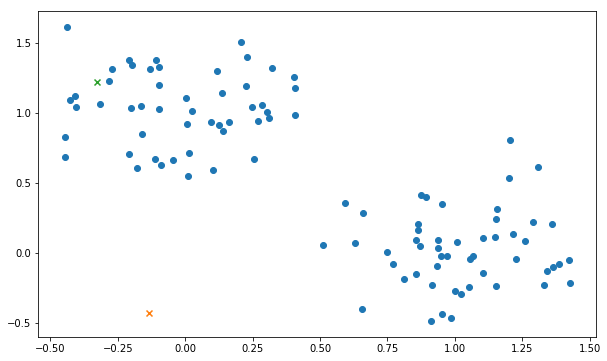

iter: 1 | log_lh: -184.13310804850082


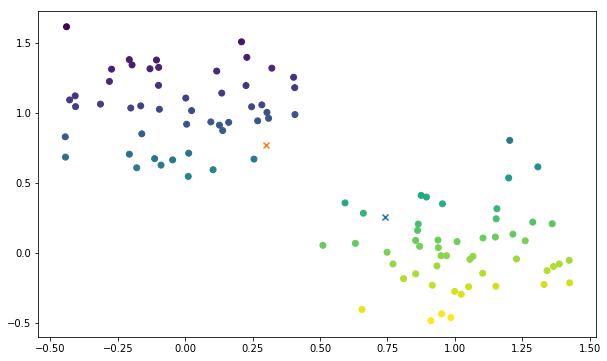

iter: 2 | log_lh: -166.47540195570872


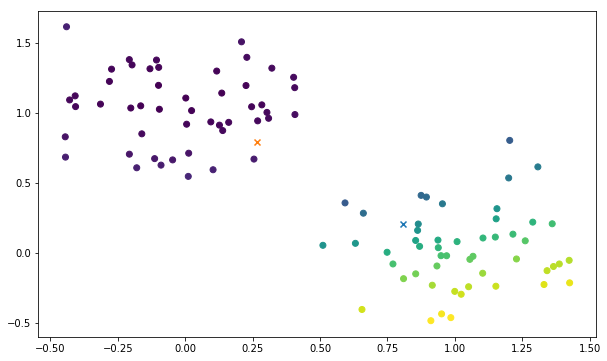

iter: 3 | log_lh: -302.21448656834406


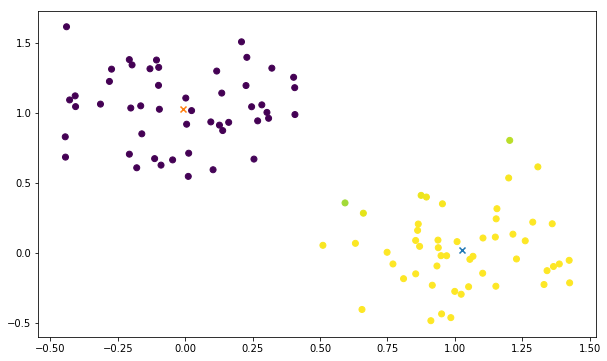

iter: 4 | log_lh: -1316.8727590024046


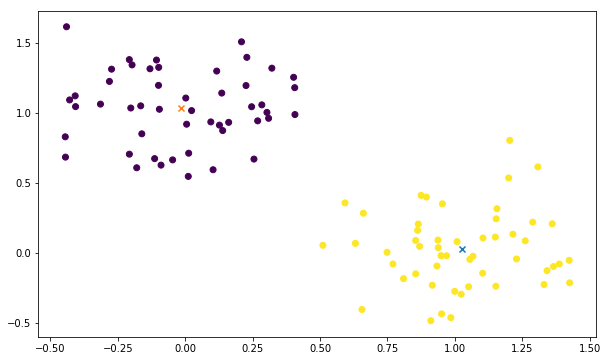

iter: 5 | log_lh: -1317.753876245487


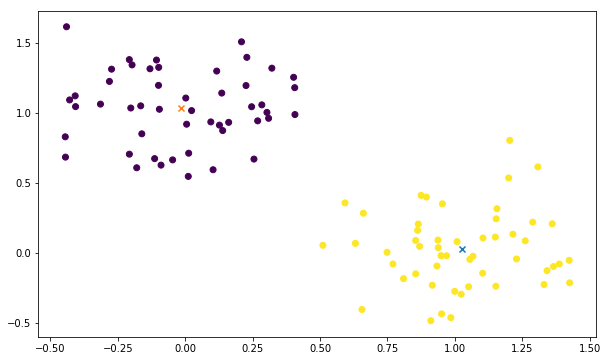

iter: 6 | log_lh: -1317.7538775781143


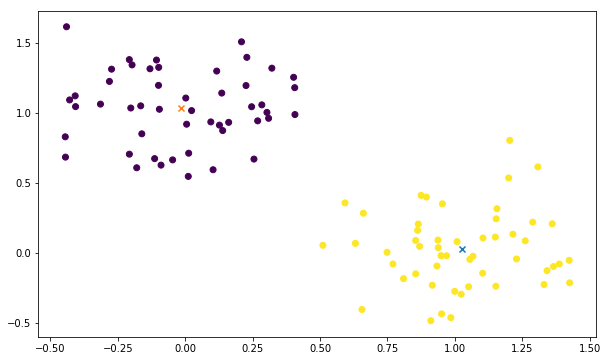

iter: 7 | log_lh: -1317.7538775781143


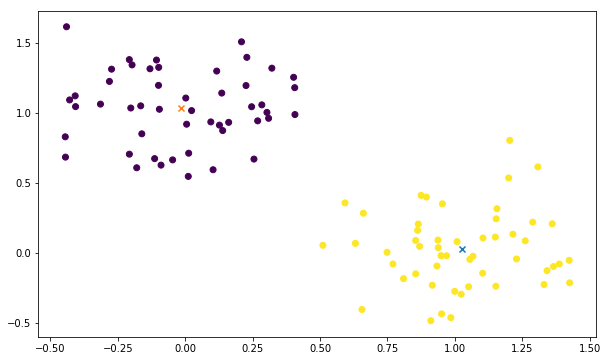

iter: 8 | log_lh: -1317.7538775781143


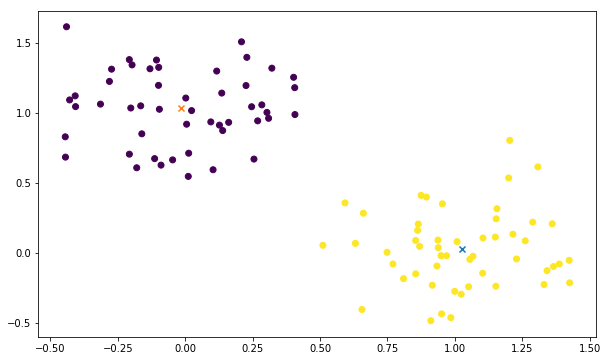

iter: 9 | log_lh: -1317.7538775781143


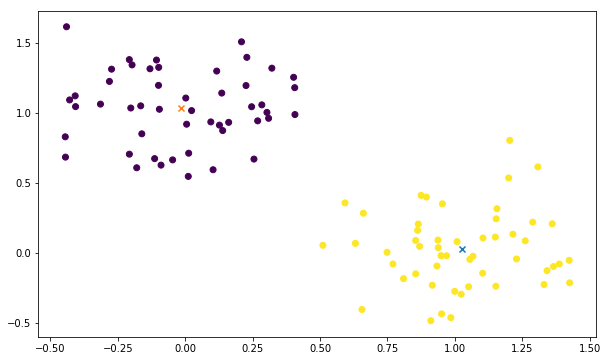

iter: 10 | log_lh: -1317.7538775781143


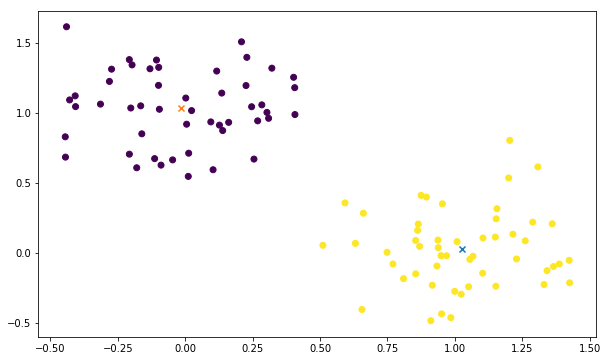

iter: 11 | log_lh: -1317.7538775781143


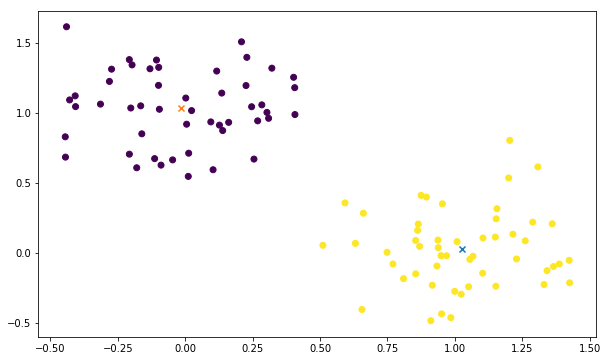

iter: 12 | log_lh: -1317.7538775781143


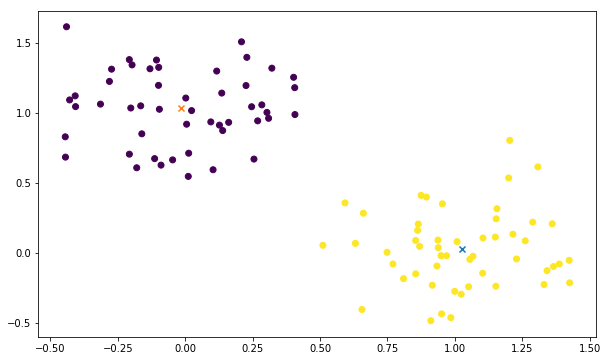

iter: 13 | log_lh: -1317.7538775781143


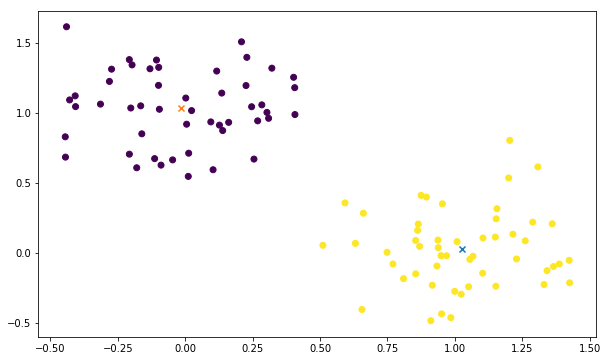

iter: 14 | log_lh: -1317.7538775781143


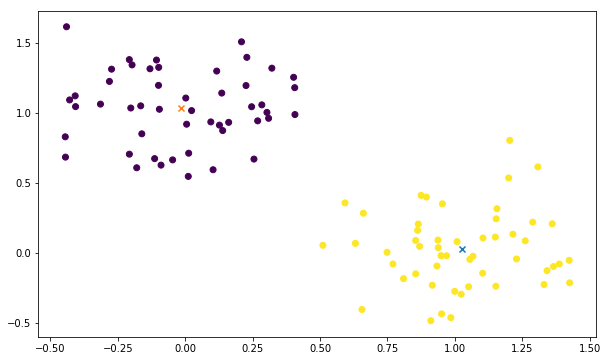

iter: 15 | log_lh: -1317.7538775781143


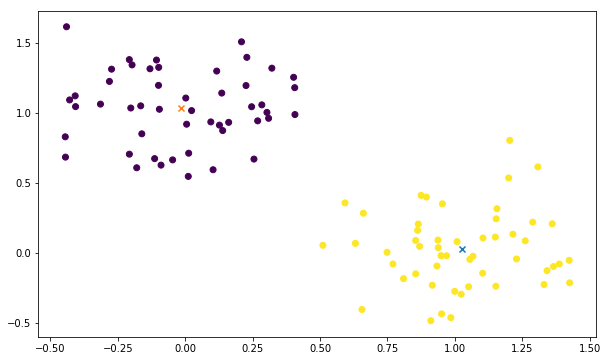

mu [[ 1.02481097  0.02820515]
 [-0.0152487   1.03288234]]
sig [[[0.05115641 0.00352566]
  [0.00352566 0.07205711]]

 [[0.06121818 0.00057632]
  [0.00057632 0.0666804 ]]]
pie [0.51 0.49]


In [31]:
em(15, 0.001)

## Exerscise 5.3.b

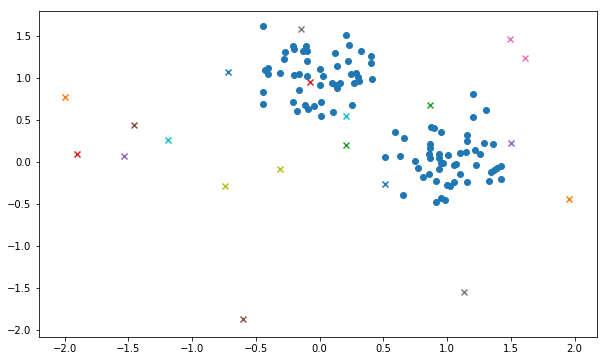

iter: 1 | log_lh: -179.66751001398325


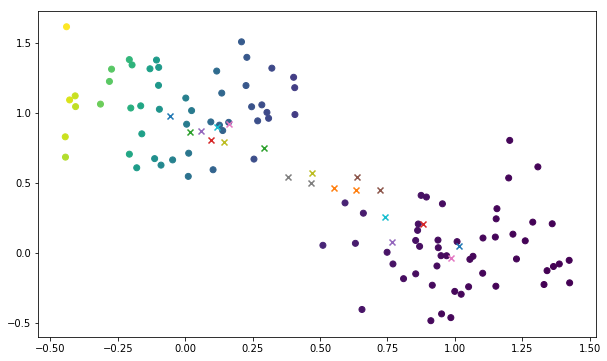

iter: 2 | log_lh: -154.33905246850435


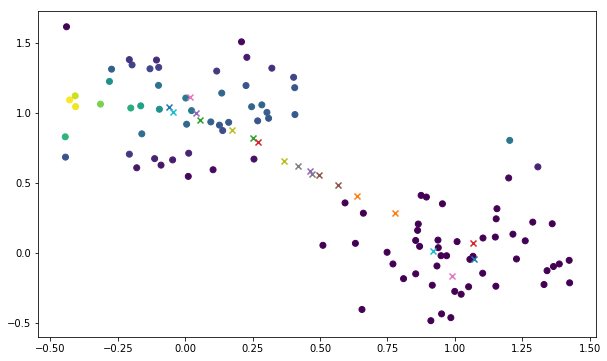

iter: 3 | log_lh: -237.16987471036452


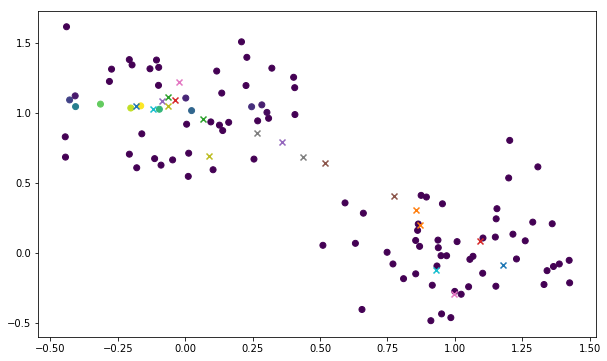

iter: 4 | log_lh: -166.2583155769525


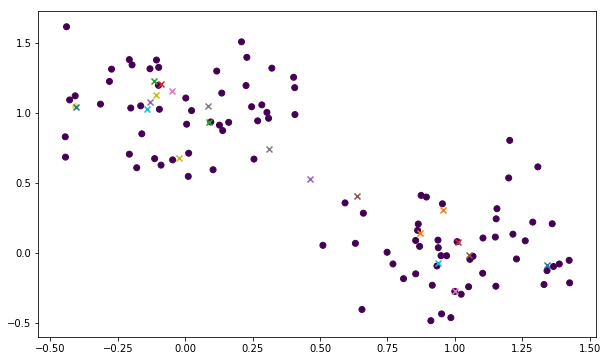

/home/mo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/mo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/mo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/mo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


iter: 5 | log_lh: nan


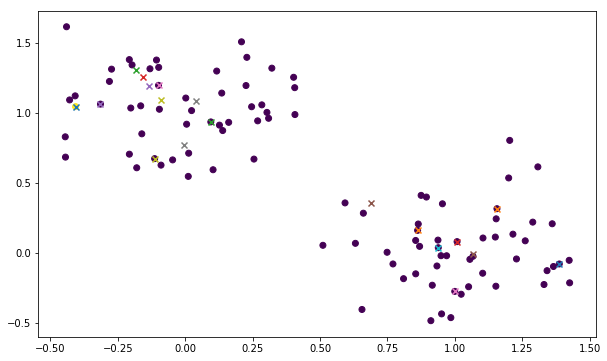

iter: 6 | log_lh: nan


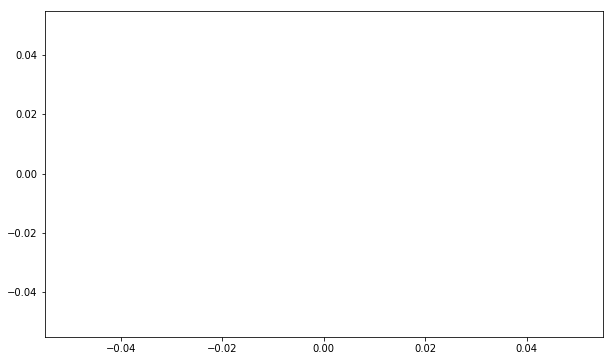

iter: 7 | log_lh: nan


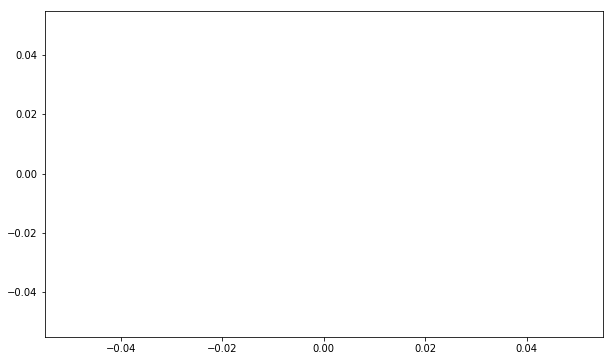

iter: 8 | log_lh: nan


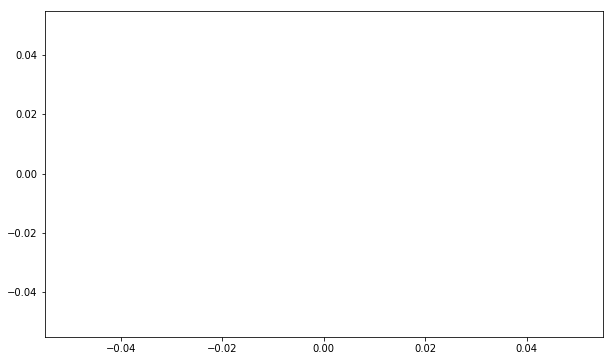

iter: 9 | log_lh: nan


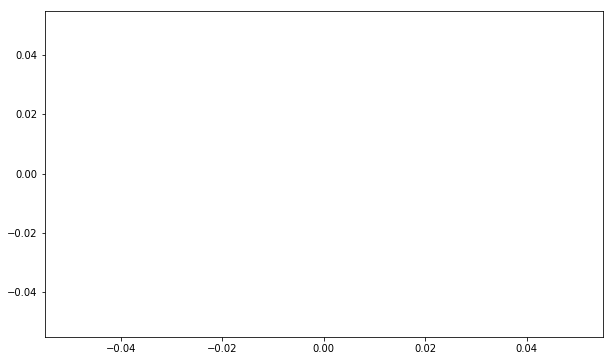

iter: 10 | log_lh: nan


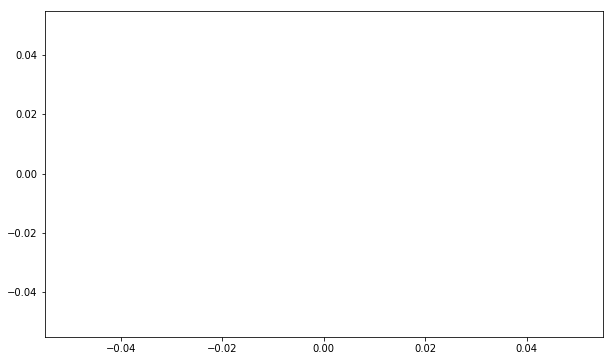

iter: 11 | log_lh: nan


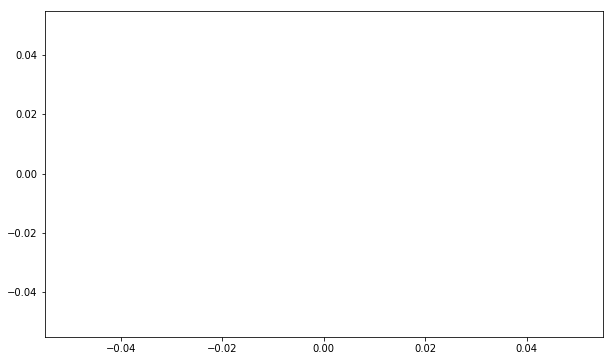

iter: 12 | log_lh: nan


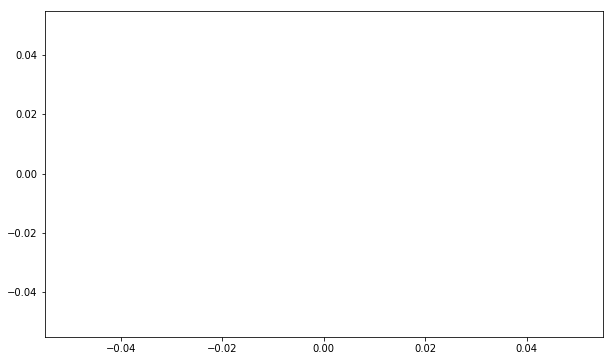

iter: 13 | log_lh: nan


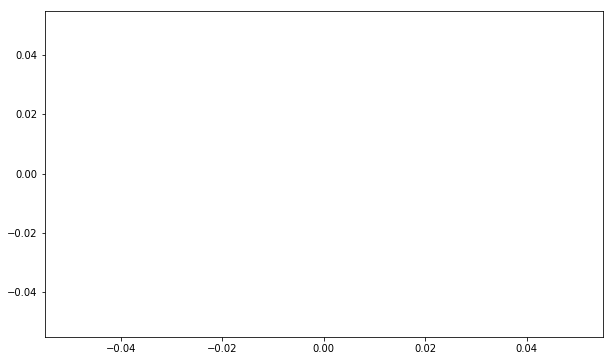

iter: 14 | log_lh: nan


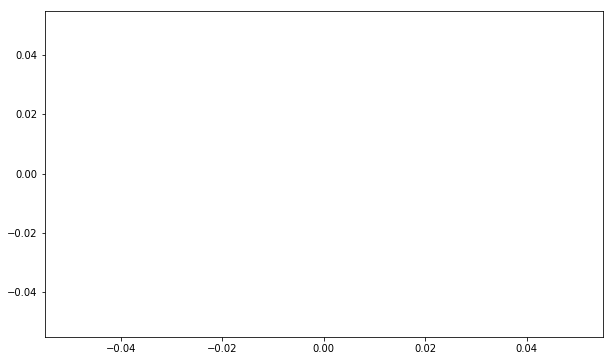

iter: 15 | log_lh: nan


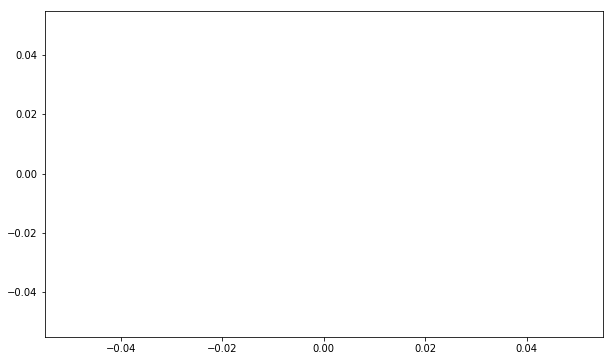

mu [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
sig [[[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]]
pie [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [37]:
em(it=15, eps=0, k=20)

## Exerscise 5.3.c